# Face Image Classification Based on Convolutional Neural Network using Pytorch
- This notebook is designed to introduce image classification using a Convolutional Neural Network (CNN) with the PyTorch library.
- The dataset used in this example consists of gray color  face images of three individuals, representing three classes.
- In this notebook, we will learn how to load and prepare the dataset, construct simple CNN architecture, training model, and evaluation assessment.


**Ying-Nong Chen's Lab: https://sites.google.com/view/yingnongchen**

## Dataset Preparation
- This notebook will use GPU (so make sure to turn on GPU in the Colab: --> Runtime --> Change runtime type --> Select T4 GPU)
- This notebook will use the image dataset saved in our Google Drive (Please download the example of dataset used from this following link:
https://drive.google.com/drive/folders/1qeoch3d4ikXnqxojebBgE5UudNcyEK5W?usp=sharing )

In [ ]:
## Import used libraries
import torch
# PyTorch 的核心套件，提供 Tensor 運算、GPU 加速與深度學習基本功能

import torch.nn as nn
# torch.nn：用來建立神經網路模型（如 Conv2d、Linear、Loss function 等）

import torch.optim as optim
# torch.optim：提供各種優化器（如 SGD、Adam），用來更新模型參數

import torch.nn.functional as F
# torch.nn.functional：提供不需定義為 layer 的函數型操作（如 ReLU、Softmax）

from torchvision import datasets, transforms
# 我只要用 torchvision 裡面的 datasets 跟 transforms，不用整包都拿。」
# torchvision.datasets：提供影像資料集讀取工具（如 ImageFolder）
# torchvision.transforms：影像前處理工具（如 Resize、ToTensor、Grayscale）

from torch.utils.data import DataLoader, Subset
# DataLoader：將資料集分批（batch）讀入模型，加速訓練與測試
# Subset：從原始資料集中依照索引建立子資料集（如 train / test）

from sklearn.model_selection import train_test_split
# train_test_split：將資料切分為訓練集與測試集，可支援分層抽樣（stratify）

import matplotlib.pyplot as plt
# matplotlib.pyplot：用來繪製圖表與影像（如 loss curve、顯示圖片）

import numpy as np
# NumPy：提供高效能數值運算與陣列操作，常用於資料處理

import random
# random：Python 內建隨機模組，用於控制隨機行為（如設定 random seed）


In [ ]:
# 設定一個「劇本編號」，我們選 42 號
seed = 42

# 告訴 Python 內建的隨機工具：從現在起，所有隨機抽籤都要照 42 號劇本走
random.seed(seed)

# 告訴 Numpy 工具箱（管矩陣的）：從現在起，所有數學運算的隨機都要照 42 號劇本走
np.random.seed(seed)

# 告訴 PyTorch（管電腦大腦 CPU 的）：從現在起，神經網路剛出生時的亂數都要照 42 號劇本走
torch.manual_seed(seed)

# 告訴 PyTorch（管顯示卡 GPU 的）：如果用顯卡算，裡面的隨機也要照 42 號劇本走
torch.cuda.manual_seed(seed)

In [ ]:
# check whether used GPU or CPU and set to device
device = torch.device("cpu")
if torch.cuda.is_available():
    device = torch.device("cuda")
elif torch.backends.mps.is_built() and torch.backends.mps.is_available():
    device = torch.device("mps")
print(device)

cuda


### Load Image Dataset from Google Drive
- Please firstly download the example of Face Dataset and placed into your Google Drive
- Connect your Google Drive for this notebook

In [ ]:
## Mounting to Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

#### Load image dataset

In [ ]:
#匯入google雲端
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Define path for our Face folder
data_dir = "/content/drive/MyDrive/face" # change it according with Face folder path

# Define transformation that used to transform our image data into tensor
# Using transform function from torchvision Library
# Resize image to get bigger input shape (usefull for more advance model)
transform = transforms.Compose([
    transforms.Resize((64, 64)), # Resize image shape
    #transforms.Grayscale(),因為是彩色所以去掉 # Transform image to grayscale
    transforms.ToTensor(),
])

# Finally we can load our dataset by using function datasets from torchvisison Library
dataset = datasets.ImageFolder(root=data_dir, transform=transform)
print(dataset)

Dataset ImageFolder
    Number of datapoints: 24
    Root location: /content/drive/MyDrive/face
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )


We have three indiviudal face data (three classes). Each folder contains of 10 images, so we will hae 30 datapoints.

#### Split dataset become training and testing set
- We want to split our dataset becom 50% for training and 50% for testing
- Note: we needs balance dataset for each class, so the umber of training of each class is 5 images and for testing also 5 images

In [ ]:
# First we nee to extract indices and labels from the dataset
indices = list(range(len(dataset)))  # List of all indices
labels = [dataset[i][1] for i in indices]  # Extract labels
seed = 42 #代表什麼？


# We use train_test_split from Sklearn Library
# to perform stratified split (50% train, 50% test)
# this procedure will makesure we have balance split data for each class
train_indices, test_indices = train_test_split(
    indices, test_size=0.5, stratify=labels, random_state=seed
)

# Produce the train and test dataset based on the image indices
train_dataset = Subset(dataset, train_indices)
test_dataset = Subset(dataset, test_indices)

print('Number of images in the training dataset:', len(train_dataset))
print('Number of images in the testing dataset:', len(test_dataset))

Number of images in the training dataset: 12
Number of images in the testing dataset: 12


In [ ]:
# Check the class distribution
from torch.utils.data import Subset

train_dataset = Subset(dataset, train_indices)
test_dataset = Subset(dataset, test_indices)

def count_classes(dataset):
    labels = [dataset[i][1] for i in range(len(dataset))]
    class_counts = np.bincount(labels)
    return {f"Class {i}": int(count) for i, count in enumerate(class_counts)}

print("Training class distribution:", count_classes(train_dataset))
print("Testing class distribution:", count_classes(test_dataset))

Training class distribution: {'Class 0': 4, 'Class 1': 4, 'Class 2': 4}
Testing class distribution: {'Class 0': 4, 'Class 1': 4, 'Class 2': 4}


In [ ]:
labels = [dataset[i][1] for i in indices]
labels

[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2]

In [ ]:
indices = list(range(len(dataset)))
indices

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

#### Create DataLoaders
After we successfully produce the training and testing daataset, we need to efficiently feed the data into our model for training and evaluation.

In [ ]:
# Create DataLoader for both training and testing data 這段在幹嘛
train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=2, shuffle=False)

print(f"Shape of the images in the training dataset: {train_loader.dataset[0][0].shape}")
print(f"Shape of the images in the testing dataset: {test_loader.dataset[0][0].shape}")

Shape of the images in the training dataset: torch.Size([3, 64, 64])
Shape of the images in the testing dataset: torch.Size([3, 64, 64])


#### Visualize example of dataset

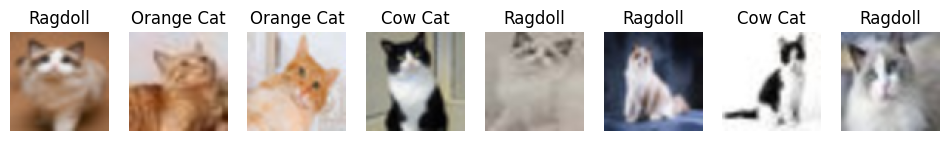

In [ ]:
# 1. 定義類別名稱，順序必須對應資料夾被讀取的順序 (通常是字母排序)
classes = ('Cow Cat', 'Orange Cat', 'Ragdoll')

# 2. 建立畫布與相框：(1列, 8欄)，figsize 定義大畫布的寬與高
# fig 是整張畫布，axes 是存放這 8 個相框的陣列
fig, axes = plt.subplots(1, 8, figsize=(12, 3))

# 3. 開始跑迴圈，逐一處理前 8 張圖片 (因為 axes 只有 8 個索引)
for i in range(8):

    # 4. 從訓練資料集中取出第 i 筆資料：dataset[i] 會回傳 (圖片張量, 標籤)
    # [0] 代表取圖片張量，目前的形狀是 [3, 64, 64] (彩色通道在最前面)
    img_tensor = train_loader.dataset[i][0]

    # 5. 關鍵維度轉換：使用 permute 將 [3, 64, 64] 轉為 [64, 64, 3]
    # 因為 Matplotlib 繪圖庫要求「顏色通道」必須放在最後一個維度
    image = img_tensor.permute(1, 2, 0).numpy()

    # 6. 指定在第 i 個相框 (axes[i]) 畫出這張彩色圖片
    # 註：彩色圖片不需要指定 cmap='gray'，Matplotlib 會自動辨識 RGB
    axes[i].imshow(image)

    # 7. 取得該圖片的標籤索引 (例如 0, 1, 或 2)
    label_idx = train_loader.dataset[i][1]

    # 8. 設定該相框的標題：透過索引去 classes 清單中查出對應的貓貓名稱
    axes[i].set_title(classes[label_idx])

    # 9. 隱藏座標軸的刻度與數字，讓圖片顯示看起來像照片牆一樣整潔
    axes[i].axis('off')

# 10. 將最終繪製好的畫布顯示在螢幕上
plt.show()

跟原先人臉辨識有所差異：

1. 維度處理方式的更改 (最核心的變動)

原本 (灰階人臉)： 使用 .squeeze(0)。

原理： 灰階圖是 [1, 64, 64]，squeeze 是把那個大小為 1 的維度「擠壓」掉，變成 [64, 64]。這是一個二維矩陣。

現在 (彩色貓貓)： 使用 .permute(1, 2, 0)。

原理： 彩色圖是 [3, 64, 64]（通道, 高, 寬）。你不能擠壓它（因為 3 擠不掉），必須把通道位置「搬家」到最後面，變成 [64, 64, 3]。這是一個三維張量。

2. 顯示模式與顏色映射 (Color Mapping)

原本 (灰階人臉)： 使用 imshow(image, cmap='gray')。

原因： 電腦不知道二維矩陣該顯示什麼顏色，所以你必須強制告訴它「請用灰階顯示」。

現在 (彩色貓貓)： 使用 imshow(image)。

原因： 當 Matplotlib 接收到一個最後維度是 3 的數據時，它會自動理解為 RGB (紅綠藍) 資訊，並直接渲染出正確的彩色顏色，因此不需要也不可以加 cmap='gray'。

3. 程式穩定性與索引對齊 (Index Safety)

原本： 你開了 8 個相框 (subplots(1, 8))，卻跑了 10 次迴圈 (range(10))。

結果： 這在 Python 中會導致 IndexError，因為程式找不到第 9 個和第 10 個相框來放圖片。

現在： 迴圈範圍修改為 range(8)。

結果： 確保「相框的數量」與「迴圈跑的次數」完全對齊，程式才能順利執行不閃退。

## Construct Simple CNN Model
- In this step, we will construct simple CNN model by using Pytorch Library
- Our simple CNN model will have: 2D Conv followed by ReLu -> Max Pooling Layer -> another 2D Conv followed by ReLu -> and another Max Pooling Layer -> reshape layer -> fully connected layer

In [ ]:
# To construct the CNN model using Pytroch we need define the class model
class SimpleCNN(nn.Module):
    def __init__(self, num_classes=3, in_channels= 3):   #因為RPG彩色處理要更換in_channels= 1變成3

        """
        In this part we will define all layers of our CNN model
        """
        super(SimpleCNN, self).__init__()

        # First convolutional layer: 1 input channel, 8 output feature maps, 3x3 kernel, stride 1, padding 1
        self.conv1 = nn.Conv2d(in_channels=in_channels, out_channels=8, kernel_size=3, stride=1, padding=1)
        # Define Max Pooling layer: 2x2 kernel size and stride 2
        self.maxpool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        # Second convolutional layer: 8 input channel, 16 output feature maps, 3x3 kernel, stride 1, padding 1
        self.conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, stride=1, padding=1)
        # Define Max Pooling layer: 2x2 kernel size and stride 2
        self.maxpool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        # Fully connected layer: 16*16*16 input features (after two 2x2 poolings), 3 output features (num_classes)
        self.fc1 = nn.Linear(16 * 16 * 16 , num_classes)

    def forward(self, x):
        """
        In this part we will define the forward pass of the CNN model
        """
        x = F.relu(self.conv1(x))  # Apply first convolution followed by ReLU activation
        x = self.maxpool1(x)       # Apply max pooling 1
        x = F.relu(self.conv2(x))  # Apply second convolution followed by ReLU activation
        x = self.maxpool2(x)       # Apply max pooling 2
        x = x.reshape(x.shape[0], -1)  # Flatten the tensor
        x = self.fc1(x) # Apply fully connected layer
        # x = F.softmax(x, dim=1)  # Apply softmax activation (dim=1 for class probabilities)

        return x

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Initialize model
model = SimpleCNN(num_classes=3,  in_channels=3)
model.to(device)
print(model)

SimpleCNN(
  (conv1): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=4096, out_features=3, bias=True)
)


In [ ]:
# Print total number of trainable parameters
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f'Total number of trainable parameters: {trainable_params}')

Total number of trainable parameters: 13683


In [ ]:
from torchsummary import summary
summary(model, (3, 64, 64)) #中間的參數 (1, 64, 64) 是在告訴電腦：「請模擬一張 1 個通道（灰階）的圖片丟進去測量。」

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 64, 64]             224
         MaxPool2d-2            [-1, 8, 32, 32]               0
            Conv2d-3           [-1, 16, 32, 32]           1,168
         MaxPool2d-4           [-1, 16, 16, 16]               0
            Linear-5                    [-1, 3]          12,291
Total params: 13,683
Trainable params: 13,683
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.05
Forward/backward pass size (MB): 0.47
Params size (MB): 0.05
Estimated Total Size (MB): 0.57
----------------------------------------------------------------


#### Define Loss and Optimizer parameters

In [ ]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss() # Since our task is image classification, we use Cross entropy as or loss function
optimizer = optim.Adam(model.parameters(), lr=0.001) # we use Adam as our optimizer

## Model training process
- After we have train dataset and constructed our CNN model the next steps is to train the CNN model by using our train data

In [ ]:
# 初始化追蹤變數
best_acc = 0.0      # 用來紀錄目前最高的準確率
best_epoch = 0      # 紀錄最高準確率發生在第幾輪
losses = []         # 紀錄每一輪的平均損失
accuracies = []     # 紀錄每一輪的測試準確率

epochs = 50

for epoch in range(epochs):
    # --- 【步驟 1：訓練模式】 ---
    model.train()
    running_loss = 0.0
    for images, targets in train_loader:
        images, targets = images.to(device), targets.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # --- 【步驟 2：測試/評估模式】 ---
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, targets in test_loader:
            images, targets = images.to(device), targets.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += targets.size(0)
            correct += (predicted == targets).sum().item()

    # 計算本輪結果
    avg_loss = running_loss / len(train_loader)
    current_acc = 100 * correct / total

    losses.append(avg_loss)
    accuracies.append(current_acc)

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}, Accuracy: {current_acc:.2f}%")

    # --- 【步驟 3：檢查是否為史上最強，是的話就存檔】 ---
    if current_acc > best_acc:
        best_acc = current_acc
        best_epoch = epoch + 1
        # 儲存目前的最佳模型狀態
        torch.save(model.state_dict(), 'best_model.pth')
        print(f"🌟 發現更強的模型！已儲存 (Acc: {best_acc:.2f}%)")

print('---')
print(f'Finished Training. 最高準確率出現在第 {best_epoch} 輪, Accuracy: {best_acc:.2f}%')

Epoch [1/50], Loss: 1.1645, Accuracy: 33.33%
🌟 發現更強的模型！已儲存 (Acc: 33.33%)
Epoch [2/50], Loss: 1.0741, Accuracy: 58.33%
🌟 發現更強的模型！已儲存 (Acc: 58.33%)
Epoch [3/50], Loss: 1.0406, Accuracy: 50.00%
Epoch [4/50], Loss: 0.9936, Accuracy: 58.33%
Epoch [5/50], Loss: 0.9093, Accuracy: 41.67%
Epoch [6/50], Loss: 0.9232, Accuracy: 58.33%
Epoch [7/50], Loss: 0.7843, Accuracy: 66.67%
🌟 發現更強的模型！已儲存 (Acc: 66.67%)
Epoch [8/50], Loss: 0.8482, Accuracy: 25.00%
Epoch [9/50], Loss: 0.7256, Accuracy: 83.33%
🌟 發現更強的模型！已儲存 (Acc: 83.33%)
Epoch [10/50], Loss: 0.6865, Accuracy: 50.00%
Epoch [11/50], Loss: 0.6202, Accuracy: 75.00%
Epoch [12/50], Loss: 0.5894, Accuracy: 50.00%
Epoch [13/50], Loss: 0.5017, Accuracy: 83.33%
Epoch [14/50], Loss: 0.4548, Accuracy: 66.67%
Epoch [15/50], Loss: 0.4372, Accuracy: 75.00%
Epoch [16/50], Loss: 0.4122, Accuracy: 41.67%
Epoch [17/50], Loss: 0.3434, Accuracy: 75.00%
Epoch [18/50], Loss: 0.3694, Accuracy: 75.00%
Epoch [19/50], Loss: 0.2710, Accuracy: 50.00%
Epoch [20/50], Loss: 0.

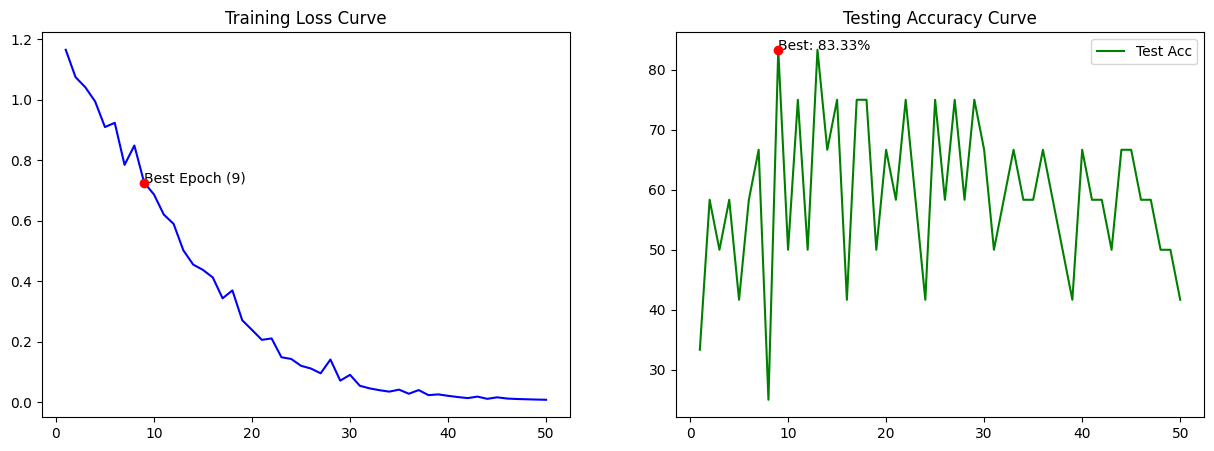

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# --- 左圖：Loss ---
ax1.plot(range(1, len(losses) + 1), losses, label='Train Loss', color='blue')
# 標註 Best Epoch 的 Loss 點
ax1.scatter(best_epoch, losses[best_epoch-1], color='red', zorder=5)
ax1.annotate(f'Best Epoch ({best_epoch})', (best_epoch, losses[best_epoch-1]))
ax1.set_title('Training Loss Curve')

# --- 右圖：Accuracy ---
ax2.plot(range(1, len(accuracies) + 1), accuracies, label='Test Acc', color='green')
# 標註最高準確率的那個點
ax2.scatter(best_epoch, best_acc, color='red', zorder=5)
ax2.annotate(f'Best: {best_acc:.2f}%', (best_epoch, best_acc))
ax2.set_title('Testing Accuracy Curve')

plt.legend()
plt.show()

## Model Evaluation Assessment

In [ ]:
# 1. 載入訓練過程中存下的「最強權重」
model.load_state_dict(torch.load('best_model.pth'))
model.to(device)
print("已成功載入最高準確率的模型權重進行測試！")

# 2. 接下來再跑原本的評估程式碼
correct = 0
total = 0
model.eval()
with torch.no_grad():
    for (images, targets) in test_loader:
        images = images.to(device)
        targets = targets.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()

overall_accuracy = 100 * correct // total
print(f'Accuracy based on BEST saved model: {overall_accuracy} %')

已成功載入最高準確率的模型權重進行測試！
Accuracy based on BEST saved model: 83 %


## Visualize the Example of Image and Preicted Class

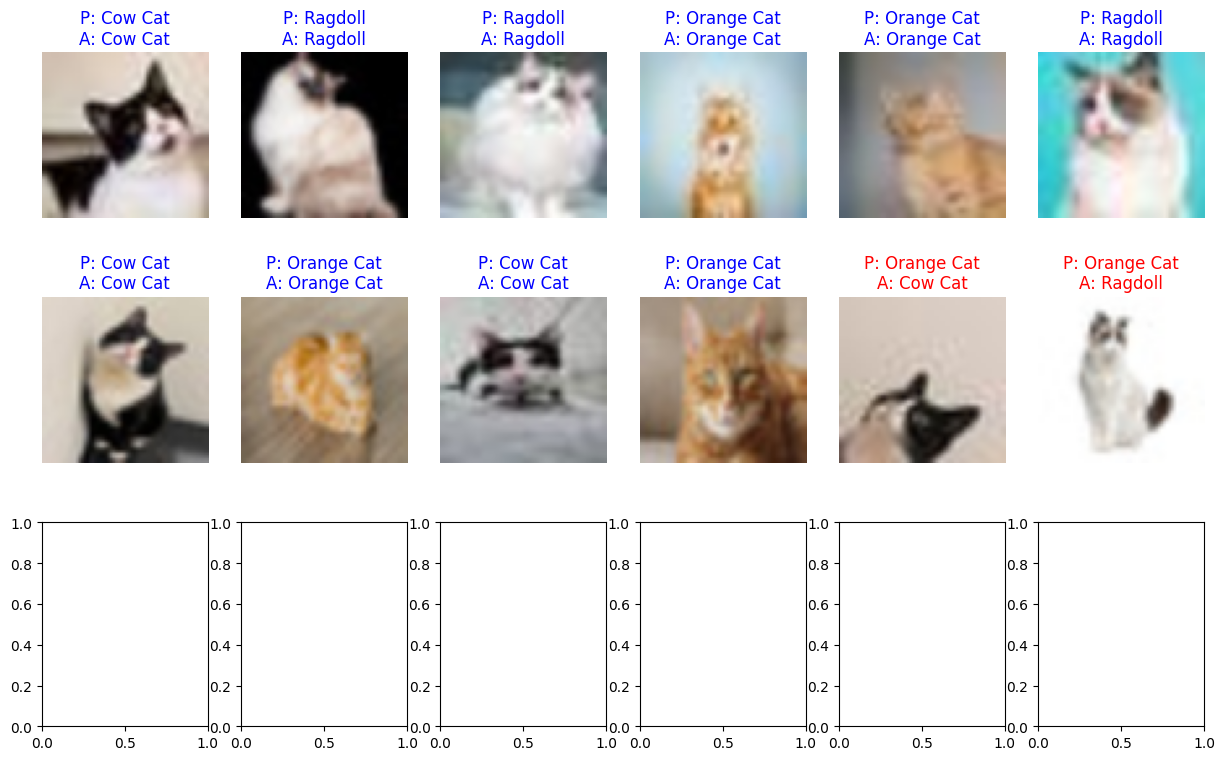

In [ ]:
import math

def visualize_grid_predictions(model, test_loader, num_images=15):
    model.eval()
    images_shown = 0

    # 計算需要幾列 (假設固定每列顯示 5 張)
    cols = 6
    rows = math.ceil(num_images / cols)

    # 建立大畫布
    fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 3))
    axes = axes.flatten() # 將多維陣列拉平，方便用單一索引訪問

    with torch.no_grad():
        for images, targets in test_loader:
            images, targets = images.to(device), targets.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)

            for i in range(len(images)):
                if images_shown >= num_images:
                    # 隱藏多餘的空白相框
                    for j in range(images_shown, len(axes)):
                        axes[j].axis('off')
                    plt.tight_layout()
                    plt.show()
                    return

                # 處理圖片維度
                img = images[i].cpu().permute(1, 2, 0).numpy()

                # 在對應的子圖上畫圖
                ax = axes[images_shown]
                ax.imshow(img)

                # 設定顏色：預測正確用藍色，預測錯誤用紅色
                color = 'blue' if predicted[i] == targets[i] else 'red'

                ax.set_title(f"P: {classes[predicted[i]]}\nA: {classes[targets[i]]}", color=color)
                ax.axis('off')

                images_shown += 1

# 執行：我想看 15 張
visualize_grid_predictions(model, test_loader, num_images=15)